In [37]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv('df_webdata.csv')


print(df)


        client_id                      visit_id  duration  start  step_1  \
0             169  749567106_99161211863_557568  00:03:33      1       1   
1             336  649044751_80905125055_554468  00:15:48      2       0   
2             546    731811517_9330176838_94847  00:02:13      1       1   
3             555  637149525_38041617439_716659  00:02:38      1       1   
4             647   40369564_40101682850_311847  00:06:17      1       1   
...           ...                           ...       ...    ...     ...   
159107    9999729   99583652_41711450505_426179  00:00:15      1       1   
159108    9999768   85676722_11636430786_122704  00:08:06      3       3   
159109    9999832  472154369_16714624241_585315  00:00:08      1       1   
159110    9999839  715530422_68620416793_515645  00:04:08      2       1   
159111    9999875    931268933_219402947_599432  00:08:38      1       2   

        step_2  step_3  confirm        variation  
0            1       1        1  Not

In [38]:

# Filtrar los datos
filtered_df = df[(df['confirm'] >= 1) & (df['variation'].isin(['Test', 'Control']))]


print("Datos Filtrados:")
print(filtered_df)


Datos Filtrados:
        client_id                      visit_id  duration  start  step_1  \
3             555  637149525_38041617439_716659  00:02:38      1       1   
4             647   40369564_40101682850_311847  00:06:17      1       1   
18           1195  393817425_39015278493_996341  00:04:05      1       1   
19           1197   71862471_21202285428_848395  00:01:35      1       1   
21           1336  583743392_96265099036_939815  00:03:31      1       1   
...           ...                           ...       ...    ...     ...   
159093    9998851  310744937_17135608286_213964  00:02:45      1       1   
159096    9998964  699981922_52880598802_858635  00:03:17      0       1   
159098    9999009  149965839_24823291142_245569  00:02:51      1       1   
159101    9999400  288904166_90826265353_276104  00:01:59      1       1   
159106    9999729  870243567_56915814033_814203  00:01:15      1       1   

        step_2  step_3  confirm variation  
3            1       1    

In [ ]:

#  Contar confirmaciones por grupo
confirm_by_group = filtered_df['variation'].value_counts()

#  Calcular totales de cada grupo después del filtro
total_test = df[df['variation'] == 'Test'].shape[0]
total_control = df[df['variation'] == 'Control'].shape[0]

#  Calcular porcentajes
percentage_test = (confirm_by_group.get('Test', 0) / total_test) * 100
percentage_control = (confirm_by_group.get('Control', 0) / total_control) * 100

#  Mostrar resultados
print("Total de confirmaciones por grupo:")
print(confirm_by_group)

print("\nPorcentaje de confirmaciones dentro de cada grupo:")
print(f"Test: {percentage_test:.2f}%")
print(f"Control: {percentage_control:.2f}%")


Total de confirmaciones por grupo:
variation
Test       21791
Control    16088
Name: count, dtype: int64

Porcentaje de confirmaciones dentro de cada grupo:
Test: 58.57%
Control: 49.90%


# Visualizaciones

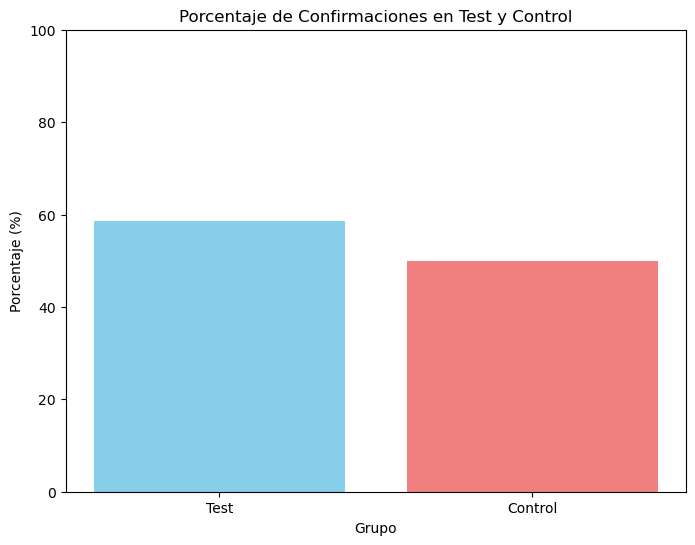

In [56]:

plt.figure(figsize=(8, 6))
plt.bar(['Test', 'Control'], [percentage_test, percentage_control], color=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Confirmaciones en Test y Control')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Grupo')
plt.ylim(0, 100)
plt.show()



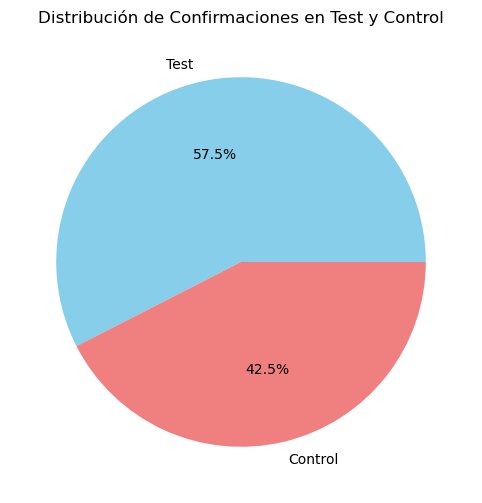

In [60]:

plt.figure(figsize=(8, 6))
plt.pie(confirm_by_group, labels=confirm_by_group.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Confirmaciones en Test y Control')
plt.show()

